In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import time

from sklearn import metrics
from sklearn.metrics import confusion_matrix, auc, precision_recall_curve, recall_score,precision_score, accuracy_score, f1_score, roc_auc_score, make_scorer, roc_curve, average_precision_score, r2_score, mean_squared_error, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, Imputer
from sklearn import preprocessing 
from sklearn import tree
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.manifold import TSNE
from sklearn.ensemble import GradientBoostingClassifier, VotingClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import ShuffleSplit, StratifiedKFold, RandomizedSearchCV, train_test_split, cross_val_predict, cross_val_score, KFold, GridSearchCV

import xgboost as xgb
from xgboost import XGBClassifier, plot_tree, plot_importance
from skopt import BayesSearchCV

import keras
from keras.layers import Input, Dense
from keras.models import Model, Sequential
from keras import regularizers

from scipy import stats
from scipy.stats import sem

from IPython.display import Image

import warnings
warnings.filterwarnings('ignore')

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/anaconda3/lib/python3.6/site-packages/requests/__init__.py:80: RequestsDependencyWarning: urllib3 (1.22) or chardet (2.3.0) doesn't match a supported version!
  RequestsDependencyWarning)


In [3]:
# Read the files
train = pd.read_csv('train_final.csv')
test = pd.read_csv('test_final.csv')

In [7]:
# check the initial values
train.head()

,Id,Y,f1,f2,f3,f4,f5,f6,f7,f8,...,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24
0,1,1,25884,1,33.63,118596,1,0,118595,125738,...,1945,118450,119184,1,121372,1,1,1,2,1
1,2,1,34346,1,10.62,118041,1,0,117902,130913,...,15385,117945,292795,1,259173,1,1,1,1,1
2,3,1,34923,1,1.77,118327,1,0,117961,124402,...,7547,118933,290919,1,118784,1,1,1,1,1
3,4,1,80926,1,30.09,118300,1,0,117961,301218,...,4933,118458,118331,1,307024,1,1,1,2,1
4,5,1,4674,1,1.77,119921,1,0,119920,302830,...,13836,142145,4673,1,128230,1,1,1,620,1


In [8]:
test.head()

,Id,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24
0,16384,37733,1,1.77,118603,1,0,118602,118097,1,...,13881,117941,117887,1,117885,1,1,1,1,1
1,16385,312129,1,3.54,118052,1,0,117961,290919,1,...,14638,118992,290919,1,118321,1,1,1,7,1
2,16386,24884,1,23.01,118300,1,0,117961,302830,1,...,770,119181,4673,1,128230,1,1,1,14,1
3,16387,4674,1,1.77,119091,1,0,119062,118036,1,...,16752,143531,290919,1,117905,1,1,1,81,1
4,16388,68725,1,3.54,118300,1,0,117961,171056,1,...,4945,118360,118638,1,118636,1,1,1,1,1


In [5]:
# train.set_index('Id',inplace=True)
# test.set_index('Id',inplace=True)

In [6]:
print('There are',train.shape[0],'rows in the training dataset')
print('There are',train.shape[1],'columns in the trainng dataset')
print('There are',test.shape[0],'rows in the testing dataset')
print('There are',test.shape[1],'columns in the testing dataset')

There are 16383 rows in the training dataset
There are 26 columns in the trainng dataset
There are 16385 rows in the testing dataset
There are 25 columns in the testing dataset


# Exploratory Data Analysis

#### Lets check how many integer type, object type and float type columns are there. In case of object type columns, we might need to convert those categorical variables to numerical using One hot encoding or Label Encoding 

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16383 entries, 0 to 16382
Data columns (total 26 columns):
Id     16383 non-null int64
Y      16383 non-null int64
f1     16383 non-null int64
f2     16383 non-null int64
f3     16383 non-null float64
f4     16383 non-null int64
f5     16383 non-null int64
f6     16383 non-null int64
f7     16383 non-null int64
f8     16383 non-null int64
f9     16383 non-null int64
f10    16383 non-null int64
f11    16383 non-null int64
f12    16383 non-null int64
f13    16383 non-null int64
f14    16383 non-null float64
f15    16383 non-null int64
f16    16383 non-null int64
f17    16383 non-null int64
f18    16383 non-null int64
f19    16383 non-null int64
f20    16383 non-null int64
f21    16383 non-null int64
f22    16383 non-null int64
f23    16383 non-null int64
f24    16383 non-null int64
dtypes: float64(2), int64(24)
memory usage: 3.2 MB


#### 1. Check Correlation between columns

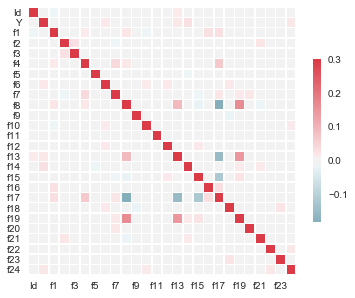

In [8]:
sns.set(style="white")


# Compute the correlation matrix
corr = train.corr()


# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(6,6))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

#### Observation:
None of the column is highly correlated with each other 

#### 2. Check null Values

In [9]:
# Check missing values
train.isnull().sum()

Id     0
Y      0
f1     0
f2     0
f3     0
f4     0
f5     0
f6     0
f7     0
f8     0
f9     0
f10    0
f11    0
f12    0
f13    0
f14    0
f15    0
f16    0
f17    0
f18    0
f19    0
f20    0
f21    0
f22    0
f23    0
f24    0
dtype: int64

In [10]:
# Check missing values
test.isnull().sum()

Id     0
f1     0
f2     0
f3     0
f4     0
f5     0
f6     0
f7     0
f8     0
f9     0
f10    0
f11    0
f12    0
f13    0
f14    0
f15    0
f16    0
f17    0
f18    0
f19    0
f20    0
f21    0
f22    0
f23    0
f24    0
dtype: int64

#### Observation: 
No missing values in both training and testing set

#### 3. Check the distribution of the dataset

In [11]:
# Lets check the description for the two columns

train.describe()

,Id,Y,f1,f2,f3,f4,f5,f6,f7,f8,...,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24
count,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,...,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,1.638300e+04,16383.000000
mean,8192.000000,0.942135,43007.775865,1.044375,11.770938,118323.581456,1.044436,0.050052,117089.674113,169730.178600,...,25894.316914,119045.099005,184622.040835,1.047305,125959.667765,1.044558,1.045718,1.041934,3.271890e+04,1.043948
std,4729.509065,0.233495,33611.182771,0.264806,353.187115,4518.059755,0.265601,0.293892,10261.292970,69396.677853,...,36086.993946,18321.987129,100590.811845,0.306239,31091.344158,0.262576,0.266874,0.246597,3.184929e+06,0.259640
min,1.000000,0.000000,-1.000000,1.000000,1.770000,23779.000000,1.000000,0.000000,4292.000000,4673.000000,...,25.000000,4674.000000,3130.000000,1.000000,117879.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000
25%,4096.500000,1.000000,20311.000000,1.000000,1.770000,118096.000000,1.000000,0.000000,117961.000000,117906.000000,...,4554.000000,118395.000000,118398.000000,1.000000,118274.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000
50%,8192.000000,1.000000,35527.000000,1.000000,1.770000,118300.000000,1.000000,0.000000,117961.000000,128130.000000,...,13234.000000,118929.000000,119095.000000,1.000000,118568.000000,1.000000,1.000000,1.000000,2.000000e+00,1.000000
75%,12287.500000,1.000000,74240.500000,1.000000,3.540000,118386.000000,1.000000,0.000000,117961.000000,234498.500000,...,38902.000000,120539.000000,290919.000000,1.000000,120006.000000,1.000000,1.000000,1.000000,9.000000e+00,1.000000
max,16383.000000,1.000000,312152.000000,7.000000,43910.160000,286791.000000,9.000000,10.000000,311178.000000,311867.000000,...,311696.000000,286792.000000,308574.000000,18.000000,311867.000000,8.000000,8.000000,7.000000,4.042886e+08,8.000000


#### Observation: 

1. f1, f3, f6, f10, f12, f14, f15, f23 have unusually high std
2. f2, f3, f5, f6, f9, f10, f12, f15, f13, f18, f20, f21, f22, f23, f24 has min, 25%, 50%, 75% almost in the same range but the highest value is pretty large maybe because of potential outlier
3. f1 has an exceptionally low min value and max value because of potential outliers

#### 4. Plot kdeplot to visualize the distribution

<Figure size 432x288 with 0 Axes>

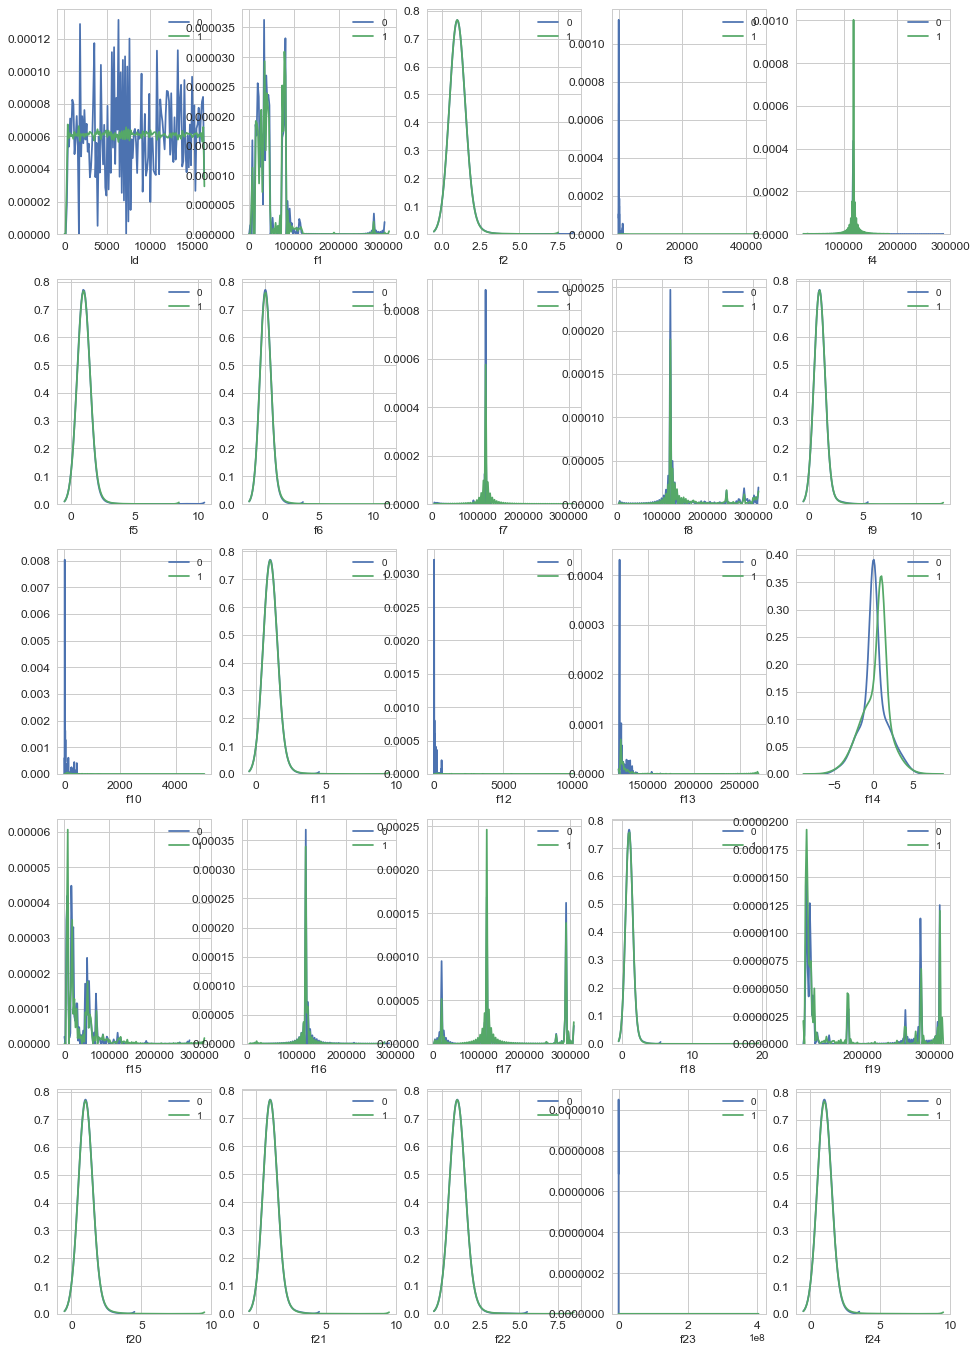

In [12]:
features = [f for f in train.columns if f not in ['Y']]

i = 0
t0 = train[train['Y'] == 0]
t1 = train[train['Y'] == 1]

sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(5,5,figsize=(16,24))

for feature in features:
    i += 1
    plt.subplot(5,5,i)
    sns.kdeplot(t0[feature], bw=0.5,label="0")
    sns.kdeplot(t1[feature], bw=0.5,label="1")
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show();

#### Observation: 
f2, f5, f6, f9, f11, f18, f20, f21, f22 and f24 have almost same distribution for both 0's and 1's therefore it will be difficult for out algorithm to seperate 1's and 0's from these distribution.
We might want to remove these features as they are not helping us improve our algorithm. Let's confirm if our hypothesis is true by checking the important feature attribute in XGBoost.  

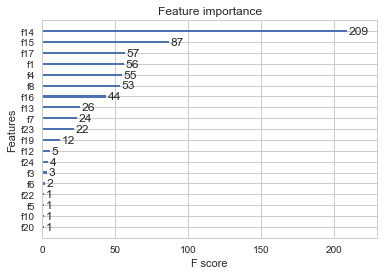

In [13]:
features = list(train.columns[2:31])

model = XGBClassifier()
model.fit(train[features],train['Y'])
# plot feature importance
plot_importance(model)
pyplot.show()

#### Observation: 
So our hypothesis was true and we can safely remove these features to improve our accuracy. 

In [10]:
train = train.drop(['f2', 'f3', 'f5', 'f6', 'f9', 'f10', 'f11', 'f12', 'f18', 'f20', 'f21', 'f22', 'f24'],axis=1)
test = test.drop(['f2', 'f3', 'f5', 'f6', 'f9', 'f10', 'f11', 'f12', 'f18', 'f20', 'f21', 'f22', 'f24'],axis=1)

#### 5. Check the distribution of the dataset

Output class_0: 948
Output class_1: 15435
Ratio of class 0 to 1:  0.06141885325558795


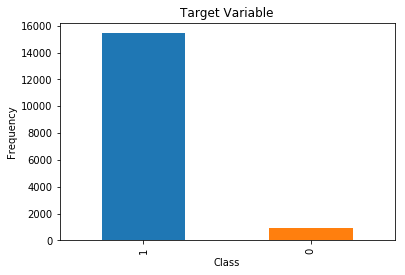

In [11]:
count_classes = pd.value_counts(train['Y'], sort = True)
count_classes.plot(kind = 'bar')

plt.title("Target Variable")
plt.xticks(range(2))
plt.xlabel("Class")
plt.ylabel("Frequency");

print('Output class_0:',train['Y'].value_counts()[0])
print('Output class_1:',train['Y'].value_counts()[1])
print('Ratio of class 0 to 1: ',train['Y'].value_counts()[0]/train['Y'].value_counts()[1])

#### Observation:
Data is highly imbalanced and we would want to remove this imbalance as our final predictor will be highly biased for one class. Methods to handle data imbalance are:
    
    1. Undersampling
    2. SMOTE
    3. Using AUC instead of accuracy as the measure
    4. Weight method (XGBoost has parameter 'scale_pos_weight' , Random Forest has 'weight=balanced')

#### NOTE: I tried SMOTE but data started overfitting hence I used weight method

#### 6. Ways to detect Outliers:
        1. IQR
        2. Scatter plot
        3. Boxplot
     I would be using Boxplot method here

In [12]:
aa = train.drop(['Id','Y'],axis=1).values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
train_scaled = min_max_scaler.fit_transform(aa)
train_normalize = pd.DataFrame(train_scaled)
train_normalize.columns = 'f1', 'f4', 'f7', 'f8', 'f13', 'f14', 'f15', 'f16', 'f17', 'f19', 'f23'

In [13]:
train_final = pd.concat([train.iloc[:,:2],train_normalize],axis=1)

In [14]:
train_final.head()

,Id,Y,f1,f4,f7,f8,f13,f14,f15,f16,f17,f19,f23
0,1,1,0.082924,0.360504,0.372461,0.394099,0.022865,0.348920,0.006160,0.403292,0.379952,0.018006,2.473480e-09
1,2,1,0.110033,0.358394,0.370203,0.410946,0.006956,0.481008,0.049283,0.401502,0.948341,0.728365,0.000000e+00
2,3,1,0.111881,0.359482,0.370395,0.389750,0.005929,0.637372,0.024134,0.405004,0.942199,0.004665,0.000000e+00
3,4,1,0.259254,0.359379,0.370395,0.965335,0.002958,0.287883,0.015747,0.403321,0.377159,0.975035,2.473480e-09
4,5,1,0.014977,0.365542,0.376778,0.970582,0.067737,0.540247,0.044313,0.487282,0.005052,0.053359,1.531084e-06


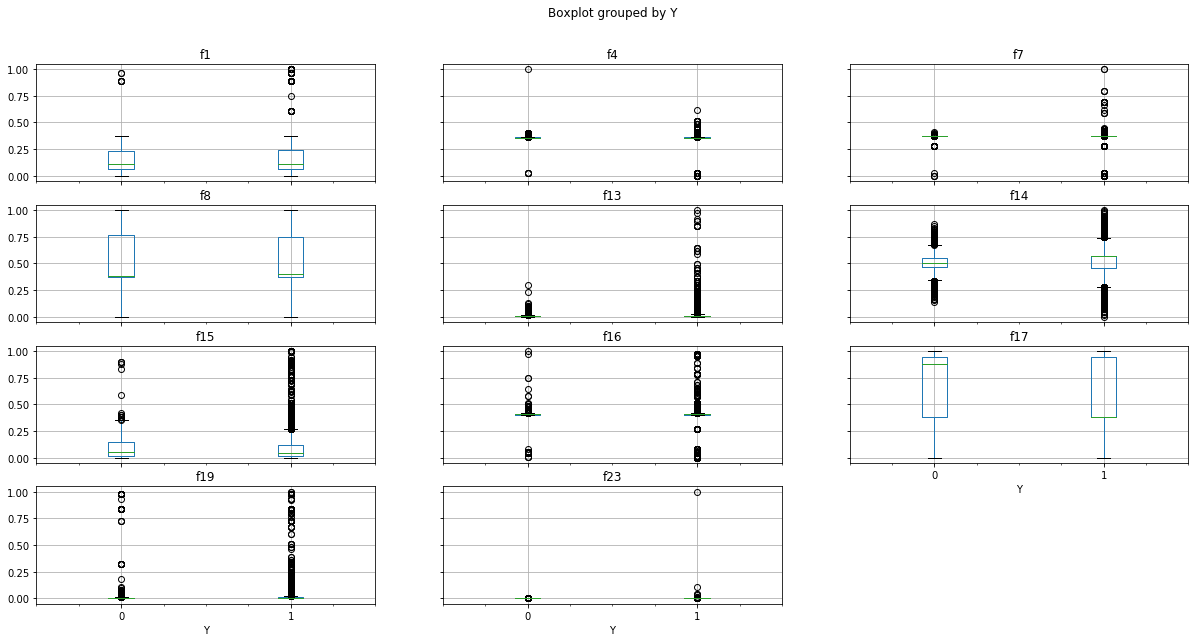

In [16]:
fig, ax = plt.subplots(figsize=(20,10))
boxplot = train_final.boxplot(by='Y',ax=ax,column=['f1','f4','f7','f8','f13','f14','f15','f16','f17','f19','f23'])

#### Observation: 

Data contains lot of outliers. Lets try removing them using z-score method which states that 99.6% points should lie within 3 standard deviation. For points outside 3 std, will be considered outliers

In [72]:
z = np.abs(stats.zscore(train_final))
train_without_outliers = train_final[(z < 3).all(axis=1)]

#### Check what's the distribution o's and 1's in the Y column after we have removed the outliers

In [73]:
train_without_outliers['Y'].unique()

array([1])

#### Obsevation:
All the 0's have been removed as they were all in outliers which makes sense. Hence we need to keep the outliers in the dataset. 

# Model Prediction

In [74]:
X = train_final.drop(['Id', 'Y'], axis=1).values
y = train_final.Y.values
test_id = test.Id.values
test_final = test.drop('Id', axis=1)

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42,stratify=y)

In [76]:
#Defining a Cross validation function
#n_folds = 10
def classification_cv(model):
    kfold = model_selection.KFold(n_splits=10, random_state=7)
    scoring = 'accuracy'
    results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    return(print("Accuracy: %.3f (%.3f)" % (results.mean(), results.std())))

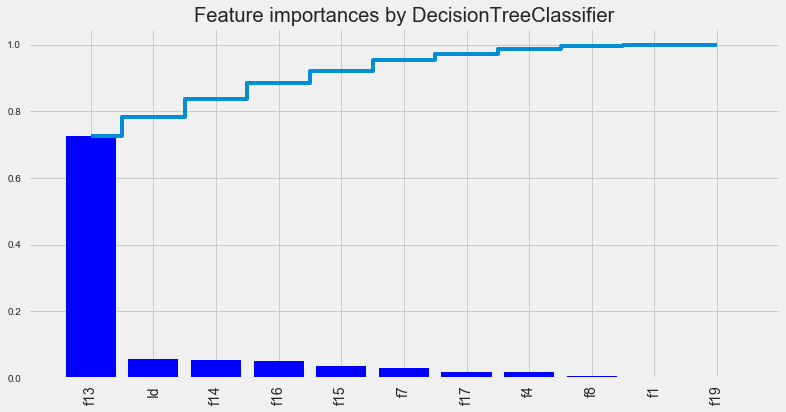

In [77]:
#Feature importance
#decision tree classifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (12,6)

# Create train and test splits

dtree = tree.DecisionTreeClassifier(
    #max_depth=3,
    class_weight="balanced",
    min_weight_fraction_leaf=0.01
    )
dtree = dtree.fit(X_train,y_train)

## plot the importances ##
importances = dtree.feature_importances_
feat_names = train.drop(['Y'],axis=1).columns


indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12,6))
plt.title("Feature importances by DecisionTreeClassifier")
plt.bar(range(len(indices)), importances[indices], color='blue',  align="center")
plt.step(range(len(indices)), np.cumsum(importances[indices]), where='mid', label='Cumulative')
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical',fontsize=14)
plt.xlim([-1, len(indices)])
plt.show()

In [78]:
# Creating base rate model
def base_rate_model(X) :
    y = np.zeros(X.shape[0])
    return y

In [79]:
# Check accuracy of base rate model-- same as percentage of majority class
y_base_rate = base_rate_model(X_test)
from sklearn.metrics import accuracy_score
print ("Base rate accuracy is %2.2f" % accuracy_score(y_test, y_base_rate))

Base rate accuracy is 0.06


In [80]:
print ("---Base Model---")
base_roc_auc = roc_auc_score(y_test, y_base_rate)
print ("Base Rate AUC = %2.2f" % base_roc_auc)
print(classification_report(y_test, y_base_rate))
print ("---Confusion Matrix---")
print(confusion_matrix(y_test, y_base_rate))

---Base Model---
Base Rate AUC = 0.50
              precision    recall  f1-score   support

           0       0.06      1.00      0.11       313
           1       0.00      0.00      0.00      5094

   micro avg       0.06      0.06      0.06      5407
   macro avg       0.03      0.50      0.05      5407
weighted avg       0.00      0.06      0.01      5407

---Confusion Matrix---
[[ 313    0]
 [5094    0]]


In [29]:
logis = LogisticRegression(penalty='l2', C=0.3,class_weight = "balanced")

#Cross validation Holdout method for learning
Logistic_regression_cv=classification_cv(logis)
Logistic_regression_cv

Accuracy: 0.588 (0.023)


In [30]:
logis.fit(X_train, y_train)
print ("\n\n ---Logistic Model---")
logit_roc_auc = roc_auc_score(y_test, logis.predict(X_test))
print ("Logistic AUC = %2.2f" % logit_roc_auc)
print(classification_report(y_test, logis.predict(X_test)))
print(confusion_matrix(y_test, logis.predict(X_test)))
print ("Logistic regression accuracy is %2.2f" % accuracy_score(y_test, logis.predict(X_test) ))



 ---Logistic Model---
Logistic AUC = 0.58
              precision    recall  f1-score   support

           0       0.08      0.54      0.14       313
           1       0.96      0.61      0.74      5094

   micro avg       0.60      0.60      0.60      5407
   macro avg       0.52      0.58      0.44      5407
weighted avg       0.91      0.60      0.71      5407

[[ 170  143]
 [2001 3093]]
Logistic regression accuracy is 0.60


In [31]:
# x_train,x_test,y_train,y_test = cross_validation.train_test_split(x,y,test_size=0.4,random_state=0)
depth = []
for i in range(3,9):
    dtree = tree.DecisionTreeClassifier(max_depth=i,criterion='gini',class_weight="balanced",min_weight_fraction_leaf=0.01)
    # Perform 7-fold cross validation 
    scores = cross_val_score(estimator=dtree, X=X_train, y=y_train, cv=7, n_jobs=4)
    depth.append((i,scores.mean()))
print(depth)

[(3, 0.6207295774683136), (4, 0.7460027564520997), (5, 0.7035398451184406), (6, 0.7200198064362722), (7, 0.7465387727390921), (8, 0.7516372681042282)]


In [32]:
dtree = tree.DecisionTreeClassifier(max_depth=8,criterion='gini',class_weight="balanced",min_weight_fraction_leaf=0.01)
dtree.fit(X_train, y_train)
print ("\n\n ---Decision Tree  Model---")
dtree_roc_auc = roc_auc_score(y_test, dtree.predict(X_test))
print ("Decision tree AUC = %2.2f" % dtree_roc_auc)
print(classification_report(y_test, dtree.predict(X_test)))
print(confusion_matrix(y_test, dtree.predict(X_test)))
print ("Decision Tree accuracy is %2.2f" % accuracy_score(y_test, dtree.predict(X_test) ))



 ---Decision Tree  Model---
Decision tree AUC = 0.68
              precision    recall  f1-score   support

           0       0.14      0.59      0.22       313
           1       0.97      0.77      0.86      5094

   micro avg       0.76      0.76      0.76      5407
   macro avg       0.55      0.68      0.54      5407
weighted avg       0.92      0.76      0.82      5407

[[ 184  129]
 [1174 3920]]
Decision Tree accuracy is 0.76


In [33]:
# Random Forest Model
rf = RandomForestClassifier(
    n_estimators=200, 
    max_depth=8,
    min_samples_split=10, 
    class_weight="balanced",
    random_state=100
    )

In [34]:
#cross validation Random Forest
classification_cv(rf)

Accuracy: 0.912 (0.008)


In [35]:
rf.fit(X_train, y_train)
print ("\n\n ---Random Forest  Model---")
rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
print ("Random Forest AUC = %2.2f" % rf_roc_auc)
print(classification_report(y_test, rf.predict(X_test)))
print(confusion_matrix(y_test, rf.predict(X_test)))
print ("Random Forest is %2.2f" % accuracy_score(y_test, rf.predict(X_test) ))




 ---Random Forest  Model---
Random Forest AUC = 0.69
              precision    recall  f1-score   support

           0       0.31      0.45      0.36       313
           1       0.97      0.94      0.95      5094

   micro avg       0.91      0.91      0.91      5407
   macro avg       0.64      0.69      0.66      5407
weighted avg       0.93      0.91      0.92      5407

[[ 140  173]
 [ 318 4776]]
Random Forest is 0.91


In [36]:
clf = SVC(kernel="linear", C=0.35, probability=True, random_state=100)

In [37]:
classification_cv(clf)

Accuracy: 0.942 (0.004)


In [38]:
clf.fit(X_train, y_train)
print ("\n\n ---SVM---")
svc_roc_auc = roc_auc_score(y_test, clf.predict(X_test))
print ("SVM AUC = %2.2f" % svc_roc_auc)
print(classification_report(y_test, clf.predict(X_test)))
print(confusion_matrix(y_test, clf.predict(X_test)))
print ("SVM accuracy is %2.2f" % accuracy_score(y_test, clf.predict(X_test) ))



 ---SVM---
SVM AUC = 0.50
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       313
           1       0.94      1.00      0.97      5094

   micro avg       0.94      0.94      0.94      5407
   macro avg       0.47      0.50      0.49      5407
weighted avg       0.89      0.94      0.91      5407

[[   0  313]
 [   0 5094]]
SVM accuracy is 0.94


In [39]:
gbc=GradientBoostingClassifier(n_estimators=400,learning_rate=0.1,random_state=100,max_features=4 )

In [40]:
gbc.fit(X_train, y_train)
print ("\n\n ---GBC---")
gbc_roc_auc = roc_auc_score(y_test, gbc.predict(X_test))
print ("GBC AUC = %2.2f" % gbc_roc_auc)
print(classification_report(y_test, gbc.predict(X_test)))
print(confusion_matrix(y_test, gbc.predict(X_test)))
print ("GBC accuracy is %2.2f" % accuracy_score(y_test, gbc.predict(X_test) ))



 ---GBC---
GBC AUC = 0.64
              precision    recall  f1-score   support

           0       0.96      0.29      0.45       313
           1       0.96      1.00      0.98      5094

   micro avg       0.96      0.96      0.96      5407
   macro avg       0.96      0.64      0.71      5407
weighted avg       0.96      0.96      0.95      5407

[[  91  222]
 [   4 5090]]
GBC accuracy is 0.96


In [41]:
xgb = XGBClassifier(learning_rate=0.2, max_delta_step=18, max_depth=36, min_child_weight=2, n_estimators=100)
model_xgb = xgb.fit(X_train, y_train)
preds_xgb = model_xgb.predict(X_test)

xgb.fit(X_train, y_train)
print ("\n\n ---XGB---")
xgb_roc_auc = roc_auc_score(y_test, xgb.predict(X_test))
print ("XGB AUC = %2.2f" % xgb_roc_auc)
print(classification_report(y_test, xgb.predict(X_test)))
print(confusion_matrix(y_test, xgb.predict(X_test)))
print ("XGB accuracy is %2.2f" % accuracy_score(y_test, xgb.predict(X_test) ))



 ---XGB---
XGB AUC = 0.65
              precision    recall  f1-score   support

           0       0.88      0.30      0.45       313
           1       0.96      1.00      0.98      5094

   micro avg       0.96      0.96      0.96      5407
   macro avg       0.92      0.65      0.71      5407
weighted avg       0.95      0.96      0.95      5407

[[  94  219]
 [  13 5081]]
XGB accuracy is 0.96


### Stacking Random Forest , Decision Tree and XGBoost

In [42]:
eclf = VotingClassifier(estimators=[('tree',dtree),('rf',rf),('xgb',xgb)], voting='soft', weights=[1,1,1])

In [43]:
eclf.fit(X_train, y_train)

VotingClassifier(estimators=[('tree', DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=8,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction...
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1))],
         flatten_transform=None, n_jobs=None, voting='soft',
         weights=[1, 1, 1])

In [44]:
print ("\n\n ---ECLF---")
eclf_roc_auc = roc_auc_score(y_test, eclf.predict(X_test))
print ("ECLF AUC = %2.2f" % eclf_roc_auc)
print(classification_report(y_test, eclf.predict(X_test)))
print(confusion_matrix(y_test, eclf.predict(X_test)))
print ("ECLF accuracy is %2.2f" % accuracy_score(y_test, eclf.predict(X_test) ))



 ---ECLF---
ECLF AUC = 0.66
              precision    recall  f1-score   support

           0       0.74      0.33      0.46       313
           1       0.96      0.99      0.98      5094

   micro avg       0.95      0.95      0.95      5407
   macro avg       0.85      0.66      0.72      5407
weighted avg       0.95      0.95      0.95      5407

[[ 104  209]
 [  37 5057]]
ECLF accuracy is 0.95


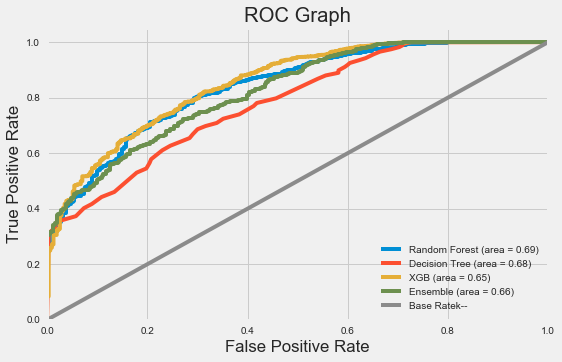

In [45]:
# Create ROC Graph
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, logis.predict_proba(X_test)[:,1])
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
dt_fpr, dt_tpr, dt_thresholds = roc_curve(y_test, dtree.predict_proba(X_test)[:,1])
xgb_fpr, xgb_tpr, xgb_thresholds = roc_curve(y_test, xgb.predict_proba(X_test)[:,1])
eclf_fpr, eclf_tpr, eclf_thresholds = roc_curve(y_test, eclf.predict_proba(X_test)[:,1])



plt.figure(figsize=(8,5))


# Plot Random Forest ROC
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)

# Plot Decision Tree ROC
plt.plot(dt_fpr, dt_tpr, label='Decision Tree (area = %0.2f)' % dtree_roc_auc)

# Plot XGB classifier ROC
plt.plot(xgb_fpr, xgb_tpr, label='XGB (area = %0.2f)' % xgb_roc_auc)

# Plot Ensemble classifier ROC
plt.plot(eclf_fpr, eclf_tpr, label='Ensemble (area = %0.2f)' % eclf_roc_auc)



# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate' 'k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show()

#### Ensemble of RF, DT and XGB and Decision isn't performing well on the dataset. Random Forest is performing the best. Lets try to improve the AUC score by hyperparameter tuning using Bayesian Optmization and cross validation

#### Hyperparamater tuning Random Forest

In [47]:
ITERATIONS = 10 # 1000
TRAINING_SIZE = 100000 # 20000000
TEST_SIZE = 25000
# Classifier
bayes_cv_tuner = BayesSearchCV(
    estimator = RandomForestClassifier(
        n_jobs = -1
    ),
    search_spaces = {
    'min_samples_split': [3, 5, 8, 10, 20], 
    'n_estimators' : [100, 500],
    'max_depth': [3, 5, 8, 10, 15],
    'max_features': [3, 5, 8]
},    
    scoring = 'roc_auc',
    cv = StratifiedKFold(
        n_splits=3,
        shuffle=True,
        random_state=42
    ),
    n_jobs = 3,
    n_iter = ITERATIONS,   
    verbose = 0,
    refit = True,
    random_state = 42
)

def status_print(optim_result):
    """Status callback durring bayesian hyperparameter search"""
    
    # Get all the models tested so far in DataFrame format
    all_models = pd.DataFrame(bayes_cv_tuner.cv_results_)    
    
    # Get current parameters and the best parameters    
    best_params = pd.Series(bayes_cv_tuner.best_params_)
    print('Model #{}\nBest ROC-AUC: {}\nBest params: {}\n'.format(
        len(all_models),
        np.round(bayes_cv_tuner.best_score_, 4),
        bayes_cv_tuner.best_params_
    ))
    
    # Save all model results
    clf_name = bayes_cv_tuner.estimator.__class__.__name__
    all_models.to_csv(clf_name+"_cv_results.csv")

In [48]:
result = bayes_cv_tuner.fit(X, y, callback=status_print)

Model #1
Best ROC-AUC: 0.8126
Best params: {'max_depth': 8, 'max_features': 8, 'min_samples_split': 20, 'n_estimators': 226}

Model #2
Best ROC-AUC: 0.8333
Best params: {'max_depth': 15, 'max_features': 8, 'min_samples_split': 5, 'n_estimators': 480}

Model #3
Best ROC-AUC: 0.8333
Best params: {'max_depth': 15, 'max_features': 8, 'min_samples_split': 5, 'n_estimators': 480}

Model #4
Best ROC-AUC: 0.8621
Best params: {'max_depth': 15, 'max_features': 3, 'min_samples_split': 8, 'n_estimators': 421}

Model #5
Best ROC-AUC: 0.8621
Best params: {'max_depth': 15, 'max_features': 3, 'min_samples_split': 8, 'n_estimators': 421}

Model #6
Best ROC-AUC: 0.8621
Best params: {'max_depth': 15, 'max_features': 3, 'min_samples_split': 8, 'n_estimators': 421}

Model #7
Best ROC-AUC: 0.8621
Best params: {'max_depth': 15, 'max_features': 3, 'min_samples_split': 8, 'n_estimators': 421}

Model #8
Best ROC-AUC: 0.8621
Best params: {'max_depth': 15, 'max_features': 3, 'min_samples_split': 8, 'n_estimators'

In [49]:
rf = RandomForestClassifier(
    n_estimators=421, 
    max_depth=15,
    max_features=3,
    min_samples_split=8, 
    class_weight="balanced",
    bootstrap=True,
    criterion='entropy',
    random_state=100
    )

rf.fit(X_train, y_train)
print ("\n\n ---Random Forest  Model---")
rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
print ("Random Forest AUC = %2.2f" % rf_roc_auc)
print(classification_report(y_test, rf.predict(X_test)))
print(confusion_matrix(y_test, rf.predict(X_test)))
print ("Random Forest is %2.2f" % accuracy_score(y_test, rf.predict(X_test) ))




 ---Random Forest  Model---
Random Forest AUC = 0.65
              precision    recall  f1-score   support

           0       0.78      0.31      0.44       313
           1       0.96      0.99      0.98      5094

   micro avg       0.95      0.95      0.95      5407
   macro avg       0.87      0.65      0.71      5407
weighted avg       0.95      0.95      0.95      5407

[[  96  217]
 [  27 5067]]
Random Forest is 0.95


#### Hyperparameter tuning XGBoost

In [50]:
import xgboost as xgb
#import lightgbm as lgb
from skopt import BayesSearchCV
from sklearn.model_selection import StratifiedKFold

# SETTINGS - CHANGE THESE TO GET SOMETHING MEANINGFUL
ITERATIONS = 10 # 1000
TRAINING_SIZE = 100000 # 20000000
TEST_SIZE = 25000


# Classifier
bayes_cv_tuner = BayesSearchCV(
    estimator = xgb.XGBClassifier(
        n_jobs = 1,
        objective = 'binary:logistic',
        eval_metric = 'auc',
        silent=1,
        tree_method='approx'
    ),
    search_spaces = {
        'learning_rate': (0.01, 1.0, 'log-uniform'),
        'min_child_weight': (0, 10),
        'max_depth': (0, 50),
        'max_delta_step': (0, 20),
        'subsample': (0.01, 1.0, 'uniform'),
        'colsample_bytree': (0.01, 1.0, 'uniform'),
        'colsample_bylevel': (0.01, 1.0, 'uniform'),
        'reg_lambda': (1e-9, 1000, 'log-uniform'),
        'reg_alpha': (1e-9, 1.0, 'log-uniform'),
        'gamma': (1e-9, 0.5, 'log-uniform'),
        'min_child_weight': (0, 5),
        'n_estimators': (50, 100),
        'scale_pos_weight': (1e-6, 500, 'log-uniform')
    },    
    scoring = 'roc_auc',
    cv = StratifiedKFold(
        n_splits=3,
        shuffle=True,
        random_state=42
    ),
    n_jobs = 3,
    n_iter = ITERATIONS,   
    verbose = 0,
    refit = True,
    random_state = 42
)

def status_print(optim_result):
    """Status callback durring bayesian hyperparameter search"""
    
    # Get all the models tested so far in DataFrame format
    all_models = pd.DataFrame(bayes_cv_tuner.cv_results_)    
    
    # Get current parameters and the best parameters    
    best_params = pd.Series(bayes_cv_tuner.best_params_)
    print('Model #{}\nBest ROC-AUC: {}\nBest params: {}\n'.format(
        len(all_models),
        np.round(bayes_cv_tuner.best_score_, 4),
        bayes_cv_tuner.best_params_
    ))
    
    # Save all model results
    clf_name = bayes_cv_tuner.estimator.__class__.__name__
    all_models.to_csv(clf_name+"_cv_results.csv")

In [51]:
result = bayes_cv_tuner.fit(X, y, callback=status_print)

Model #1
Best ROC-AUC: 0.8266
Best params: {'colsample_bylevel': 0.4160029192647807, 'colsample_bytree': 0.7304484857455519, 'gamma': 0.13031389926541354, 'learning_rate': 0.042815319280763466, 'max_delta_step': 13, 'max_depth': 21, 'min_child_weight': 2, 'n_estimators': 87, 'reg_alpha': 5.497557739289786e-07, 'reg_lambda': 0.05936070635912049, 'scale_pos_weight': 0.060830282487222144, 'subsample': 0.13556548021189216}

Model #2
Best ROC-AUC: 0.8422
Best params: {'colsample_bylevel': 0.8390144719977516, 'colsample_bytree': 0.8844821246070537, 'gamma': 4.358684608480795e-07, 'learning_rate': 0.7988179462781242, 'max_delta_step': 17, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 68, 'reg_alpha': 0.0005266983003701547, 'reg_lambda': 276.5424475574225, 'scale_pos_weight': 0.3016410771843142, 'subsample': 0.9923710598637134}

Model #3
Best ROC-AUC: 0.8422
Best params: {'colsample_bylevel': 0.8390144719977516, 'colsample_bytree': 0.8844821246070537, 'gamma': 4.358684608480795e-07, '



 ---XGB---
XGB AUC = 0.76
              precision    recall  f1-score   support

           0       0.27      0.62      0.37       313
           1       0.97      0.90      0.93      5094

   micro avg       0.88      0.88      0.88      5407
   macro avg       0.62      0.76      0.65      5407
weighted avg       0.93      0.88      0.90      5407

[[ 193  120]
 [ 530 4564]]
XGB accuracy is 0.88


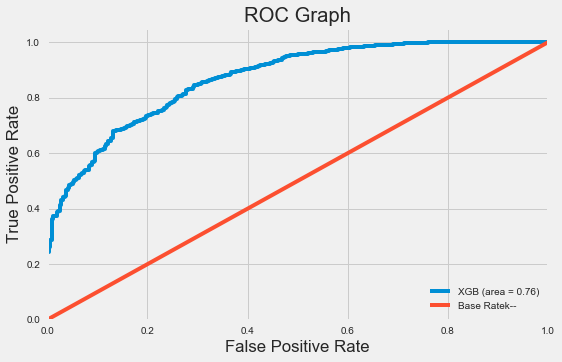

In [52]:
xgb = XGBClassifier(colsample_bylevel=0.8015579071911014, colsample_bytree=0.44364889457651413, gamma=3.811128976537413e-05,
                    learning_rate=0.2700390206185342, max_delta_step=18, max_depth=36, min_child_weight=2, n_estimators=83, 
                    reg_alpha= 1.5057560255472018e-06, reg_lambda= 0.08186810622382998, scale_pos_weight= 0.029004593634154585, 
                    subsample= 0.8835665823899177)

model_xgb = xgb.fit(X_train, y_train)
preds_xgb = model_xgb.predict(X_test)

print ("\n\n ---XGB---")
xgb_roc_auc = roc_auc_score(y_test, preds_xgb)
print ("XGB AUC = %2.2f" % xgb_roc_auc)
print(classification_report(y_test, preds_xgb))
print(confusion_matrix(y_test, preds_xgb))
print ("XGB accuracy is %2.2f" % accuracy_score(y_test, preds_xgb ))

# Create ROC Graph
xgb_fpr, xgb_tpr, xgb_thresholds = roc_curve(y_test, xgb.predict_proba(X_test)[:,1])


plt.figure(figsize=(8,5))


# Plot XGB classifier ROC
plt.plot(xgb_fpr, xgb_tpr, label='XGB (area = %0.2f)' % xgb_roc_auc)


# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate' 'k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show()

#### Observation: XGBoost gave better AUC than Random Forest after hyperparameter tuning. 

### XGBoost : Cross Validation using k Folds

In [53]:
def gini(actual, pred, cmpcol = 0, sortcol = 1):
    assert( len(actual) == len(pred) )
    all = np.asarray(np.c_[ actual, pred, np.arange(len(actual)) ], dtype=np.float)
    all = all[ np.lexsort((all[:,2], -1*all[:,1])) ]
    totalLosses = all[:,0].sum()
    giniSum = all[:,0].cumsum().sum() / totalLosses
    
    giniSum -= (len(actual) + 1) / 2.
    return giniSum / len(actual)
 
def gini_normalized(a, p):
    return gini(a, p) / gini(a, a)

def gini_xgb(preds, dtrain):
    labels = dtrain.get_label()
    gini_score = gini_normalized(labels, preds)
    return 'gini', gini_score


In [55]:
kfold = 20
skf = StratifiedKFold(n_splits=kfold, random_state=42)

In [59]:
params = {'colsample_bylevel': 0.8015579071911014, 'colsample_bytree': 0.44364889457651413, 'gamma': 3.811128976537413e-05, 
          'learning_rate': 0.2700390206185342, 'max_delta_step': 18, 'max_depth': 36, 'min_child_weight': 2, 
          'n_estimators': 83, 'reg_alpha': 1.5057560255472018e-06, 'reg_lambda': 0.08186810622382998, 
          'scale_pos_weight': 0.029004593634154585, 'subsample': 0.8835665823899177}
X = train_final.drop(['Id', 'Y'], axis=1).values
y = train_final.Y.values


In [60]:
sub = pd.DataFrame()
sub['Id'] = test_id
sub['Y'] = np.zeros_like(test_id)

In [84]:
import xgboost as xgb
for i, (train_index, test_index) in enumerate(skf.split(X, y)):
    print('[Fold %d/%d]' % (i + 1, kfold))
    X_train, X_valid = X[train_index], X[test_index]
    y_train, y_valid = y[train_index], y[test_index]
    # Convert our data into XGBoost format
    d_train = xgb.DMatrix(X_train, y_train)
    d_valid = xgb.DMatrix(X_valid, y_valid)
    d_test = xgb.DMatrix(test_final.values)
    watchlist = [(d_train, 'train'), (d_valid, 'valid')]

    # Train the model! We pass in a max of 1,600 rounds (with early stopping after 70)
    # and the custom metric (maximize=True tells xgb that higher metric is better)
    mdl = xgb.train(params, d_train, 1600, watchlist, early_stopping_rounds=70, feval=gini_xgb, maximize=True, verbose_eval=100)

    print('[Fold %d/%d Prediciton:]' % (i + 1, kfold))
    # Predict on our test data
    p_test = mdl.predict(d_test, ntree_limit=mdl.best_ntree_limit)
    sub['Y'] += p_test/kfold

[Fold 1/20]
[23:37:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 504 extra nodes, 0 pruned nodes, max_depth=15
[0]	train-rmse:0.446741	valid-rmse:0.455602	train-gini:0.836928	valid-gini:0.559585
Multiple eval metrics have been passed: 'valid-gini' will be used for early stopping.

Will train until valid-gini hasn't improved in 70 rounds.
[23:37:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 650 extra nodes, 0 pruned nodes, max_depth=21
[23:37:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 656 extra nodes, 0 pruned nodes, max_depth=20
[23:37:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 772 extra nodes, 2 pruned nodes, max_depth=26
[23:37:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 632 extra nodes, 0 pruned nodes, max_depth=23
[23:37:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 828 extra nodes, 0 pruned nodes, max_depth=27
[23:37:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 694 ext

[23:37:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 746 extra nodes, 32 pruned nodes, max_depth=36
[23:37:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 760 extra nodes, 40 pruned nodes, max_depth=36
[23:37:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 804 extra nodes, 22 pruned nodes, max_depth=26
[23:37:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 808 extra nodes, 42 pruned nodes, max_depth=32
[23:37:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 558 extra nodes, 38 pruned nodes, max_depth=28
[23:37:34] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 796 extra nodes, 36 pruned nodes, max_depth=36
[23:37:34] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 666 extra nodes, 26 pruned nodes, max_depth=25
[23:37:34] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 584 extra nodes, 22 pruned nodes, max_depth=27
[23:37:34] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 746 extra no

[23:37:36] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 558 extra nodes, 4 pruned nodes, max_depth=24
[23:37:36] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 786 extra nodes, 8 pruned nodes, max_depth=36
[23:37:36] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 648 extra nodes, 14 pruned nodes, max_depth=23
[23:37:36] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 730 extra nodes, 12 pruned nodes, max_depth=28
[23:37:36] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 858 extra nodes, 4 pruned nodes, max_depth=29
[23:37:36] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 812 extra nodes, 4 pruned nodes, max_depth=33
[23:37:36] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 858 extra nodes, 14 pruned nodes, max_depth=31
[23:37:36] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 680 extra nodes, 10 pruned nodes, max_depth=26
[23:37:36] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 618 extra nodes,

[23:37:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 732 extra nodes, 0 pruned nodes, max_depth=36
[23:37:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 786 extra nodes, 0 pruned nodes, max_depth=24
[23:37:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 676 extra nodes, 0 pruned nodes, max_depth=35
[23:37:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 746 extra nodes, 8 pruned nodes, max_depth=33
[23:37:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 540 extra nodes, 4 pruned nodes, max_depth=22
[23:37:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 836 extra nodes, 6 pruned nodes, max_depth=24
[23:37:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 696 extra nodes, 2 pruned nodes, max_depth=33
[23:37:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 840 extra nodes, 0 pruned nodes, max_depth=36
[23:37:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 772 extra nodes, 6 p

[23:37:41] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 406 extra nodes, 68 pruned nodes, max_depth=23
[23:37:41] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 682 extra nodes, 64 pruned nodes, max_depth=28
[23:37:41] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 690 extra nodes, 48 pruned nodes, max_depth=36
[23:37:41] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 554 extra nodes, 76 pruned nodes, max_depth=35
Stopping. Best iteration:
[19]	train-rmse:0.218645	valid-rmse:0.287749	train-gini:0.999811	valid-gini:0.62867

[Fold 3/20 Prediciton:]
[Fold 4/20]
[23:37:41] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 510 extra nodes, 0 pruned nodes, max_depth=19
[0]	train-rmse:0.445798	valid-rmse:0.459898	train-gini:0.8477	valid-gini:0.472582
Multiple eval metrics have been passed: 'valid-gini' will be used for early stopping.

Will train until valid-gini hasn't improved in 70 rounds.
[23:37:41] src/tree/updater_prune.cc:74: tree prunin

[23:37:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 766 extra nodes, 20 pruned nodes, max_depth=36
[23:37:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 732 extra nodes, 80 pruned nodes, max_depth=27
[23:37:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 740 extra nodes, 64 pruned nodes, max_depth=36
[23:37:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 612 extra nodes, 40 pruned nodes, max_depth=31
[23:37:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 518 extra nodes, 42 pruned nodes, max_depth=25
[23:37:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 794 extra nodes, 24 pruned nodes, max_depth=36
[23:37:44] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 816 extra nodes, 30 pruned nodes, max_depth=28
[23:37:44] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 590 extra nodes, 56 pruned nodes, max_depth=26
[23:37:44] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 630 extra no

[23:37:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 814 extra nodes, 38 pruned nodes, max_depth=36
[23:37:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 618 extra nodes, 26 pruned nodes, max_depth=33
[23:37:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 842 extra nodes, 30 pruned nodes, max_depth=36
[23:37:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 808 extra nodes, 26 pruned nodes, max_depth=36
[23:37:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 724 extra nodes, 40 pruned nodes, max_depth=34
[23:37:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 826 extra nodes, 18 pruned nodes, max_depth=36
[23:37:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 828 extra nodes, 12 pruned nodes, max_depth=36
[23:37:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 778 extra nodes, 14 pruned nodes, max_depth=25
[23:37:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 638 extra no

[23:37:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 844 extra nodes, 2 pruned nodes, max_depth=31
[23:37:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 636 extra nodes, 6 pruned nodes, max_depth=28
[23:37:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 802 extra nodes, 6 pruned nodes, max_depth=28
[23:37:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 858 extra nodes, 22 pruned nodes, max_depth=30
[23:37:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 806 extra nodes, 10 pruned nodes, max_depth=31
[23:37:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 816 extra nodes, 6 pruned nodes, max_depth=28
[23:37:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 460 extra nodes, 20 pruned nodes, max_depth=22
[23:37:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 770 extra nodes, 14 pruned nodes, max_depth=33
[23:37:49] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 770 extra nodes,

[Fold 6/20 Prediciton:]
[Fold 7/20]
[23:37:51] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 526 extra nodes, 2 pruned nodes, max_depth=16
[0]	train-rmse:0.447606	valid-rmse:0.45401	train-gini:0.840906	valid-gini:0.542368
Multiple eval metrics have been passed: 'valid-gini' will be used for early stopping.

Will train until valid-gini hasn't improved in 70 rounds.
[23:37:51] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 716 extra nodes, 0 pruned nodes, max_depth=20
[23:37:51] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 704 extra nodes, 0 pruned nodes, max_depth=23
[23:37:51] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 646 extra nodes, 0 pruned nodes, max_depth=24
[23:37:51] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 630 extra nodes, 2 pruned nodes, max_depth=25
[23:37:51] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 622 extra nodes, 2 pruned nodes, max_depth=21
[23:37:51] src/tree/updater_prune.cc:74: tree prunin

[23:37:53] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 812 extra nodes, 40 pruned nodes, max_depth=35
[23:37:53] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 828 extra nodes, 16 pruned nodes, max_depth=36
[23:37:53] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 612 extra nodes, 40 pruned nodes, max_depth=27
[23:37:53] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 790 extra nodes, 20 pruned nodes, max_depth=28
[23:37:53] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 750 extra nodes, 86 pruned nodes, max_depth=26
[23:37:53] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 760 extra nodes, 76 pruned nodes, max_depth=26
Stopping. Best iteration:
[5]	train-rmse:0.332103	valid-rmse:0.352643	train-gini:0.988837	valid-gini:0.738612

[Fold 7/20 Prediciton:]
[Fold 8/20]
[23:37:54] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 508 extra nodes, 0 pruned nodes, max_depth=16
[0]	train-rmse:0.445336	valid-rmse:0.453217	train

[23:37:56] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 818 extra nodes, 20 pruned nodes, max_depth=36
[23:37:56] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 844 extra nodes, 12 pruned nodes, max_depth=36
[23:37:56] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 566 extra nodes, 46 pruned nodes, max_depth=26
[23:37:56] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 662 extra nodes, 28 pruned nodes, max_depth=31
[23:37:56] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 578 extra nodes, 52 pruned nodes, max_depth=22
[23:37:56] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 710 extra nodes, 28 pruned nodes, max_depth=36
[23:37:56] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 824 extra nodes, 44 pruned nodes, max_depth=25
[23:37:56] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 650 extra nodes, 38 pruned nodes, max_depth=31
[23:37:56] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 786 extra no

[23:37:58] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 772 extra nodes, 66 pruned nodes, max_depth=36
[23:37:59] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 714 extra nodes, 144 pruned nodes, max_depth=26
[23:37:59] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 668 extra nodes, 146 pruned nodes, max_depth=36
[23:37:59] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 806 extra nodes, 50 pruned nodes, max_depth=31
[23:37:59] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 582 extra nodes, 96 pruned nodes, max_depth=26
[23:37:59] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 578 extra nodes, 86 pruned nodes, max_depth=36
[23:37:59] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 618 extra nodes, 86 pruned nodes, max_depth=36
[23:37:59] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 594 extra nodes, 136 pruned nodes, max_depth=36
[23:37:59] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 614 extra

[23:38:01] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 846 extra nodes, 10 pruned nodes, max_depth=28
[23:38:01] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 828 extra nodes, 38 pruned nodes, max_depth=25
[23:38:01] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 832 extra nodes, 42 pruned nodes, max_depth=29
[23:38:01] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 764 extra nodes, 20 pruned nodes, max_depth=25
[23:38:01] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 728 extra nodes, 12 pruned nodes, max_depth=20
[23:38:01] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 744 extra nodes, 24 pruned nodes, max_depth=30
[23:38:01] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 826 extra nodes, 42 pruned nodes, max_depth=21
[23:38:01] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 798 extra nodes, 14 pruned nodes, max_depth=36
[23:38:01] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 514 extra no

[23:38:04] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 794 extra nodes, 8 pruned nodes, max_depth=35
[23:38:04] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 674 extra nodes, 28 pruned nodes, max_depth=31
[23:38:04] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 876 extra nodes, 18 pruned nodes, max_depth=31
[23:38:04] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 738 extra nodes, 16 pruned nodes, max_depth=32
[23:38:04] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 862 extra nodes, 8 pruned nodes, max_depth=36
[23:38:04] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 780 extra nodes, 12 pruned nodes, max_depth=24
[23:38:04] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 832 extra nodes, 30 pruned nodes, max_depth=32
[23:38:04] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 678 extra nodes, 20 pruned nodes, max_depth=21
[23:38:04] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 844 extra node

[23:38:06] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 776 extra nodes, 2 pruned nodes, max_depth=26
[23:38:06] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 800 extra nodes, 2 pruned nodes, max_depth=30
[23:38:06] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 632 extra nodes, 2 pruned nodes, max_depth=24
[23:38:06] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 840 extra nodes, 2 pruned nodes, max_depth=30
[23:38:06] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 730 extra nodes, 2 pruned nodes, max_depth=26
[23:38:06] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 766 extra nodes, 4 pruned nodes, max_depth=28
[23:38:06] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 682 extra nodes, 0 pruned nodes, max_depth=36
[23:38:06] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 816 extra nodes, 2 pruned nodes, max_depth=21
[23:38:06] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 866 extra nodes, 0 p

[23:38:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 582 extra nodes, 34 pruned nodes, max_depth=32
[23:38:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 830 extra nodes, 30 pruned nodes, max_depth=27
[23:38:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 700 extra nodes, 24 pruned nodes, max_depth=26
[23:38:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 764 extra nodes, 72 pruned nodes, max_depth=28
[23:38:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 604 extra nodes, 50 pruned nodes, max_depth=25
[23:38:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 738 extra nodes, 78 pruned nodes, max_depth=34
[23:38:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 758 extra nodes, 82 pruned nodes, max_depth=25
[23:38:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 696 extra nodes, 32 pruned nodes, max_depth=36
[23:38:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 738 extra no

[23:38:12] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 818 extra nodes, 12 pruned nodes, max_depth=34
[23:38:12] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 794 extra nodes, 26 pruned nodes, max_depth=25
[23:38:12] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 816 extra nodes, 68 pruned nodes, max_depth=30
[23:38:12] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 568 extra nodes, 34 pruned nodes, max_depth=21
[23:38:12] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 670 extra nodes, 24 pruned nodes, max_depth=30
[23:38:12] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 698 extra nodes, 60 pruned nodes, max_depth=24
[23:38:12] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 758 extra nodes, 74 pruned nodes, max_depth=31
[23:38:12] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 666 extra nodes, 26 pruned nodes, max_depth=32
[23:38:12] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 796 extra no

[23:38:14] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 798 extra nodes, 16 pruned nodes, max_depth=32
[23:38:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 818 extra nodes, 26 pruned nodes, max_depth=26
[23:38:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 744 extra nodes, 18 pruned nodes, max_depth=36
[23:38:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 818 extra nodes, 42 pruned nodes, max_depth=27
[23:38:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 452 extra nodes, 26 pruned nodes, max_depth=26
[23:38:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 774 extra nodes, 36 pruned nodes, max_depth=26
[23:38:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 762 extra nodes, 22 pruned nodes, max_depth=36
[23:38:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 744 extra nodes, 66 pruned nodes, max_depth=36
[23:38:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 780 extra no

[23:38:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 840 extra nodes, 38 pruned nodes, max_depth=31
[23:38:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 768 extra nodes, 16 pruned nodes, max_depth=32
[23:38:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 768 extra nodes, 4 pruned nodes, max_depth=36
[23:38:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 778 extra nodes, 24 pruned nodes, max_depth=24
[23:38:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 696 extra nodes, 6 pruned nodes, max_depth=27
[23:38:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 830 extra nodes, 28 pruned nodes, max_depth=31
[23:38:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 776 extra nodes, 40 pruned nodes, max_depth=23
[23:38:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 838 extra nodes, 6 pruned nodes, max_depth=36
[23:38:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 734 extra nodes

[23:38:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 730 extra nodes, 6 pruned nodes, max_depth=22
[23:38:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 806 extra nodes, 0 pruned nodes, max_depth=24
[23:38:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 888 extra nodes, 4 pruned nodes, max_depth=30
[23:38:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 724 extra nodes, 4 pruned nodes, max_depth=32
[23:38:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 576 extra nodes, 6 pruned nodes, max_depth=28
[23:38:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 782 extra nodes, 6 pruned nodes, max_depth=27
[23:38:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 700 extra nodes, 2 pruned nodes, max_depth=36
[23:38:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 804 extra nodes, 8 pruned nodes, max_depth=34
[23:38:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 620 extra nodes, 6 p

[23:38:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 738 extra nodes, 40 pruned nodes, max_depth=31
[23:38:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 822 extra nodes, 20 pruned nodes, max_depth=36
[23:38:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 702 extra nodes, 66 pruned nodes, max_depth=35
[23:38:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 738 extra nodes, 88 pruned nodes, max_depth=36
[23:38:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 516 extra nodes, 50 pruned nodes, max_depth=22
[23:38:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 612 extra nodes, 42 pruned nodes, max_depth=23
[23:38:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 808 extra nodes, 34 pruned nodes, max_depth=36
[23:38:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 698 extra nodes, 82 pruned nodes, max_depth=36
[23:38:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 634 extra no

[23:38:25] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 820 extra nodes, 10 pruned nodes, max_depth=30
[23:38:25] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 586 extra nodes, 42 pruned nodes, max_depth=24
[23:38:25] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 750 extra nodes, 34 pruned nodes, max_depth=23
[23:38:25] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 840 extra nodes, 8 pruned nodes, max_depth=31
[23:38:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 840 extra nodes, 8 pruned nodes, max_depth=33
[23:38:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 742 extra nodes, 50 pruned nodes, max_depth=27
[23:38:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 764 extra nodes, 54 pruned nodes, max_depth=36
[23:38:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 820 extra nodes, 30 pruned nodes, max_depth=36
[23:38:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 688 extra node

[23:38:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 774 extra nodes, 4 pruned nodes, max_depth=24
[23:38:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 864 extra nodes, 6 pruned nodes, max_depth=33
[23:38:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 598 extra nodes, 12 pruned nodes, max_depth=31
[23:38:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 832 extra nodes, 6 pruned nodes, max_depth=24
[23:38:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 784 extra nodes, 6 pruned nodes, max_depth=34
[23:38:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 754 extra nodes, 16 pruned nodes, max_depth=19
[23:38:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 826 extra nodes, 4 pruned nodes, max_depth=36
[23:38:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 824 extra nodes, 8 pruned nodes, max_depth=26
[23:38:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 572 extra nodes, 2

[23:38:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 780 extra nodes, 16 pruned nodes, max_depth=36
[23:38:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 670 extra nodes, 72 pruned nodes, max_depth=36
[23:38:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 790 extra nodes, 36 pruned nodes, max_depth=36
[23:38:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 692 extra nodes, 98 pruned nodes, max_depth=27
[23:38:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 664 extra nodes, 64 pruned nodes, max_depth=36
[23:38:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 636 extra nodes, 32 pruned nodes, max_depth=36
[23:38:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 680 extra nodes, 84 pruned nodes, max_depth=27
[23:38:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 632 extra nodes, 54 pruned nodes, max_depth=31
[23:38:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 494 extra no

Multiple eval metrics have been passed: 'valid-gini' will be used for early stopping.

Will train until valid-gini hasn't improved in 70 rounds.
[23:38:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 756 extra nodes, 0 pruned nodes, max_depth=23
[23:38:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 738 extra nodes, 0 pruned nodes, max_depth=28
[23:38:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 650 extra nodes, 0 pruned nodes, max_depth=20
[23:38:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 734 extra nodes, 0 pruned nodes, max_depth=23
[23:38:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 818 extra nodes, 2 pruned nodes, max_depth=26
[23:38:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 808 extra nodes, 0 pruned nodes, max_depth=20
[23:38:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 816 extra nodes, 4 pruned nodes, max_depth=17
[23:38:35] src/tree/updater_prune.cc:74: tree pruning end

[23:38:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 784 extra nodes, 30 pruned nodes, max_depth=34
[23:38:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 802 extra nodes, 14 pruned nodes, max_depth=33
[23:38:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 846 extra nodes, 26 pruned nodes, max_depth=30
[23:38:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 442 extra nodes, 32 pruned nodes, max_depth=21
[23:38:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 736 extra nodes, 74 pruned nodes, max_depth=31
[23:38:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 786 extra nodes, 78 pruned nodes, max_depth=34
[23:38:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 440 extra nodes, 48 pruned nodes, max_depth=23
[23:38:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 728 extra nodes, 84 pruned nodes, max_depth=29
[23:38:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 492 extra no

[23:38:40] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 536 extra nodes, 42 pruned nodes, max_depth=23
[23:38:40] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 700 extra nodes, 36 pruned nodes, max_depth=29
[23:38:41] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 852 extra nodes, 6 pruned nodes, max_depth=32
[23:38:41] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 768 extra nodes, 24 pruned nodes, max_depth=36
[23:38:41] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 518 extra nodes, 26 pruned nodes, max_depth=24
[23:38:41] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 716 extra nodes, 36 pruned nodes, max_depth=33
[23:38:41] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 812 extra nodes, 22 pruned nodes, max_depth=32
[23:38:41] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 502 extra nodes, 48 pruned nodes, max_depth=21
[23:38:41] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 806 extra nod

[23:38:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 840 extra nodes, 2 pruned nodes, max_depth=36
[23:38:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 840 extra nodes, 30 pruned nodes, max_depth=26
[23:38:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 818 extra nodes, 18 pruned nodes, max_depth=33
[23:38:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 454 extra nodes, 14 pruned nodes, max_depth=23
[23:38:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 814 extra nodes, 24 pruned nodes, max_depth=30
[23:38:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 814 extra nodes, 14 pruned nodes, max_depth=28
[23:38:44] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 734 extra nodes, 8 pruned nodes, max_depth=36
[23:38:44] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 832 extra nodes, 10 pruned nodes, max_depth=33
[23:38:44] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 826 extra node

In [86]:
sub.to_csv('StratifiedKFold.csv', index=False)